In [ ]:
!wget http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz

--2024-06-17 11:56:52--  http://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Resolving www.robots.ox.ac.uk (www.robots.ox.ac.uk)... 129.67.94.2
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz [following]
--2024-06-17 11:56:53--  https://www.robots.ox.ac.uk/~vgg/data/pets/data/images.tar.gz
Connecting to www.robots.ox.ac.uk (www.robots.ox.ac.uk)|129.67.94.2|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz [following]
--2024-06-17 11:56:53--  https://thor.robots.ox.ac.uk/~vgg/data/pets/images.tar.gz
Resolving thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)... 129.67.95.98
Connecting to thor.robots.ox.ac.uk (thor.robots.ox.ac.uk)|129.67.95.98|:443... connected.
HTTP request sent, awaiting response... 301 Moved Perman

In [ ]:
!tar -xzvf /content/images.tar.gz

Streaming output truncated to the last 5000 lines.
images/american_bulldog_194.jpg
images/Birman_175.jpg
images/american_bulldog_178.jpg
images/staffordshire_bull_terrier_93.jpg
images/Egyptian_Mau_58.jpg
images/havanese_44.jpg
images/english_cocker_spaniel_97.jpg
images/Ragdoll_111.jpg
images/american_pit_bull_terrier_159.jpg
images/english_setter_134.jpg
images/english_setter_87.jpg
images/wheaten_terrier_198.jpg
images/pug_180.jpg
images/boxer_172.jpg
images/Sphynx_197.jpg
images/german_shorthaired_2.jpg
images/British_Shorthair_9.jpg
images/pug_89.jpg
images/japanese_chin_39.jpg
images/Ragdoll_20.jpg
images/american_bulldog_111.jpg
images/yorkshire_terrier_112.jpg
images/Persian_88.jpg
images/pug_9.jpg
images/Birman_40.jpg
images/British_Shorthair_272.jpg
images/havanese_7.jpg
images/pomeranian_154.jpg
images/beagle_49.jpg
images/British_Shorthair_94.jpg
images/Persian_90.jpg
images/staffordshire_bull_terrier_30.jpg
images/samoyed_113.jpg
images/english_cocker_spaniel_46.jpg
images

In [ ]:
import os
import shutil

# Constants
IMAGES_DIR = '/content/images'
ORGANIZED_DIR = '/content/organized_images'

# Create the organized images directory if it does not exist
os.makedirs(ORGANIZED_DIR, exist_ok=True)

# Process each image in the images directory
for img_name in os.listdir(IMAGES_DIR):
    if img_name.endswith('.jpg'):
        # Extract the class name from the filename
        class_name = img_name.split('_')[0]

        # Create a directory for the class if it does not exist
        class_dir = os.path.join(ORGANIZED_DIR, class_name)
        os.makedirs(class_dir, exist_ok=True)

        # Move the image to the corresponding class directory
        src_path = os.path.join(IMAGES_DIR, img_name)
        dest_path = os.path.join(class_dir, img_name)
        shutil.move(src_path, dest_path)

print("Images have been organized into classes.")


Images have been organized into classes.


Found 5913 images belonging to 35 classes.
Found 1477 images belonging to 35 classes.
Epoch 1/50
185/185 [==============================] - 53s 270ms/step - loss: 3.4836 - accuracy: 0.0646 - val_loss: 4.8092 - val_accuracy: 0.0271 - lr: 0.0010
Epoch 2/50
185/185 [==============================] - 50s 269ms/step - loss: 3.3690 - accuracy: 0.0830 - val_loss: 3.7379 - val_accuracy: 0.0616 - lr: 0.0010
Epoch 3/50
185/185 [==============================] - 50s 270ms/step - loss: 3.2740 - accuracy: 0.1108 - val_loss: 3.4488 - val_accuracy: 0.0731 - lr: 0.0010
Epoch 4/50
185/185 [==============================] - 50s 270ms/step - loss: 3.1725 - accuracy: 0.1250 - val_loss: 3.4191 - val_accuracy: 0.0853 - lr: 0.0010
Epoch 5/50
185/185 [==============================] - 50s 269ms/step - loss: 3.0507 - accuracy: 0.1439 - val_loss: 3.6757 - val_accuracy: 0.0853 - lr: 0.0010
Epoch 6/50
185/185 [==============================] - 49s 267ms/step - loss: 2.8945 - accuracy: 0.1774 - val_loss: 5.3425 - 

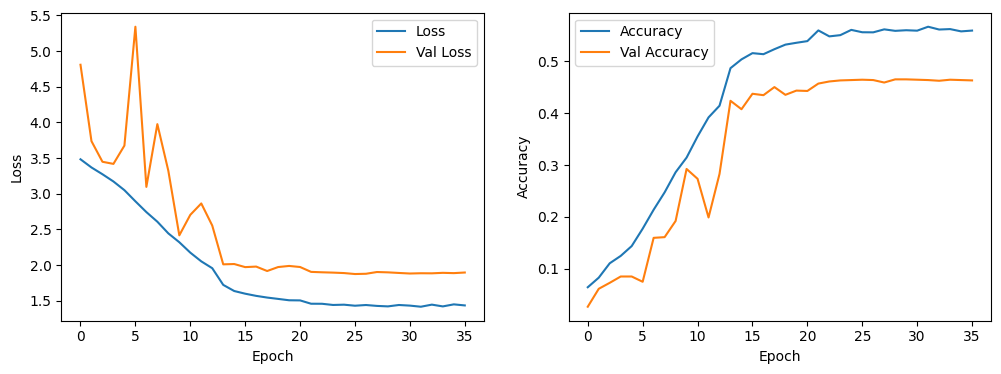

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os

# Path to the dataset
dataset_dir = '/content/organized_images'
IMAG_SIZE = 128

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./IMAG_SIZE,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

val_datagen = ImageDataGenerator(
    rescale=1./IMAG_SIZE,
    validation_split=0.2  # Use 20% of the data for validation
)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMAG_SIZE, IMAG_SIZE),
    batch_size=32,
    class_mode='sparse',
    subset='training'  # Set as training data
)

val_generator = val_datagen.flow_from_directory(
    dataset_dir,
    target_size=(IMAG_SIZE, IMAG_SIZE),
    batch_size=32,
    class_mode='sparse',
    subset='validation'  # Set as validation data
)

# Improved model definition
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMAG_SIZE, IMAG_SIZE, 3), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(512, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(train_generator.num_classes, activation='softmax', dtype='float32')
])

# Compile the model with a learning rate scheduler
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Learning rate scheduler and early stopping
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(train_generator, epochs=50, validation_data=val_generator, callbacks=[lr_scheduler, early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(val_generator)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

plot_history(history)


ReduceLROnPlateau
ReduceLROnPlateau is a callback in TensorFlow/Keras that helps to adjust the learning rate during training. The learning rate is a crucial hyperparameter in training neural networks, determining how quickly or slowly a model learns.

Purpose: The primary goal of this callback is to reduce the learning rate when the validation loss has stopped improving, which is often a sign that the model has reached a plateau in its learning process.

MaxPooling2D((2, 2)): This layer reduces the spatial dimensions by a factor of 2, which helps in reducing the computational load and extracting dominant features.